<a href="https://colab.research.google.com/github/Labibbib/Case-Study-03-Group-F/blob/main/CS3_part3_kNN_GroupF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

### **LOAD DATA**

In [2]:
file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df_knn = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
    df_knn= pd.read_csv(file_)

print(df_knn.shape)
df_knn.head()

[Errno 2] No such file or directory: 'data/Ashrae_Energy_Mean.csv'  Trying to load data from GitHub.
--2024-11-24 15:25:06--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241207 (236K) [text/plain]
Saving to: ‘data/Ashrae_Energy_Mean.csv’

Ashrae_Energy_Mean. 100%[===================>] 235.55K  1.39MB/s    in 0.2s    

2024-11-24 15:25:07 (1.39 MB/s) - ‘data/Ashrae_Energy_Mean.csv’ saved [241207/241207]

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [3]:
df_knn.describe(include='all')

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413,1413.000000,663.000000,352.000000,1413.000000,1396.000000,1413.000000,1237.000000,1324.000000,1413.000000,1413.000000
unique,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,185.383188,NaN,92204.792640,1968.170437,3.738636,15.697154,2.166618,8.259831,1.187860,1016.466990,175.351051,3.564617
std,374.899500,NaN,111412.340117,31.026539,3.336731,5.416736,1.461644,4.625295,1.478667,1.921973,24.921236,0.737746
min,0.000400,NaN,283.000000,1900.000000,1.000000,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,NaN,22949.000000,1949.500000,1.000000,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,NaN,57673.000000,1970.000000,3.000000,15.204244,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,182.884848,NaN,115288.000000,1995.500000,5.000000,21.325261,2.998727,9.834399,1.033215,1017.949437,187.301104,3.905433


## PREPROCESSING

### PERIKSA DUPLIKASI

In [4]:
df_knn.duplicated().sum()

0

### MENGUBAH TIPE VARIABEL

In [5]:
df_knn['primary_use'] = df_knn['primary_use'].astype('category')

### MISSING VALUE DAN PENANGANANYA

In [6]:
# Misalnya, df adalah DataFrame Anda
missing_values = df_knn.isnull().sum()  # Menghitung jumlah missing value per kolom
missing_percentage = (missing_values / len(df_knn)) * 100  # Menghitung persentase missing value

# Menampilkan hasilnya dalam bentuk DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                    Missing Values  Percentage
meter_reading                    0    0.000000
primary_use                      0    0.000000
square_feet                      0    0.000000
year_built                     750   53.078556
floor_count                   1061   75.088464
air_temperature                  0    0.000000
cloud_coverage                  17    1.203114
dew_temperature                  0    0.000000
precip_depth_1_hr              176   12.455768
sea_level_pressure              89    6.298655
wind_direction                   0    0.000000
wind_speed                       0    0.000000


In [7]:
# Menghapus missing value yang lebih dari 50%
df_knn.drop(['year_built', 'floor_count'], axis=1, inplace=True)

In [8]:
# Imputasi kolom yang masih ada missing value dengan median
for kolom in ['cloud_coverage','precip_depth_1_hr','sea_level_pressure']:
  df_knn.loc[:, kolom].fillna(df_knn.loc[:, kolom].median(), inplace=True)

<ipython-input-8-d1e24200b3f2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_knn.loc[:, kolom].fillna(df_knn.loc[:, kolom].median(), inplace=True)


### MEMERIKSA NOISE

In [9]:
# Melihat nilai unik per kolom
for column in df_knn.columns:
    print(f"Nilai unik untuk kolom '{column}':")
    print(df_knn[column].unique())
    print("\n")


Nilai unik untuk kolom 'meter_reading':
[237.7491275  118.55374309  23.62649987 ...   7.21134691 187.11799411
   3.33859478]


Nilai unik untuk kolom 'primary_use':
['Education', 'Lodging/residential', 'Office', 'Entertainment/public assembly', 'Other', ..., 'Healthcare', 'Utility', 'Technology/science', 'Manufacturing/industrial', 'Services']
Length: 16
Categories (16, object): ['Education', 'Entertainment/public assembly',
                          'Food sales and service', 'Healthcare', ..., 'Services', 'Technology/science',
                          'Utility', 'Warehouse/storage']


Nilai unik untuk kolom 'square_feet':
[ 7432  2720  5376 ... 11265 29775 92271]


Nilai unik untuk kolom 'air_temperature':
[22.74481579 12.01550697 24.96370238 15.50251797 14.72536218 11.05862891
 15.20424406  7.57213642 21.32526143 11.70435446  9.95909196  9.11562797
 13.10965386  9.07913823]


Nilai unik untuk kolom 'cloud_coverage':
[2.99872748 0.05926623 2.08371163 4.07923534 1.84457582 0.38835402


### OUTLIER

<Axes: xlabel='meter_reading'>

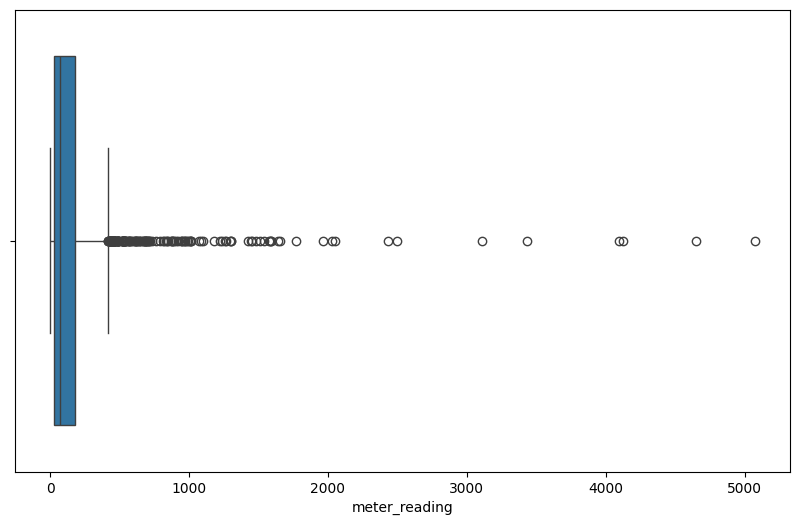

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_knn['meter_reading'], orient='h')

### NORMALISASI

Mengubah distribusi fitur numerik pada dataset menggunakan QuantileTransformer, sebuah teknik normalisasi yang memetakan data input ke distribusi target tertentu

In [11]:
num_cols = ['meter_reading', 'square_feet', 'air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed']
cat_cols = ['primary_use']

In [12]:
from sklearn.preprocessing import QuantileTransformer

# Gunakan QuantileTransformer
scaler_quantile = QuantileTransformer()
df_knn_quantile = df_knn[num_cols].copy()
df_knn_quantile[num_cols] = scaler_quantile.fit_transform(df_knn[num_cols])

# Menampilkan hasil setelah QuantileTransformer
print(df_knn_quantile.head())


   meter_reading  square_feet  air_temperature  cloud_coverage  \
0       0.805836     0.079789         0.842843        0.718719   
1       0.628009     0.024835         0.842843        0.718719   
2       0.227863     0.057239         0.842843        0.718719   
3       0.876009     0.258785         0.842843        0.718719   
4       0.987983     0.754341         0.842843        0.718719   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0              1.0           0.845846            0.744745        0.173173   
1              1.0           0.845846            0.744745        0.173173   
2              1.0           0.845846            0.744745        0.173173   
3              1.0           0.845846            0.744745        0.173173   
4              1.0           0.845846            0.744745        0.173173   

   wind_speed  
0    0.374374  
1    0.374374  
2    0.374374  
3    0.374374  
4    0.374374  


In [13]:
# Memeriksa rata-rata dan deviasi standar dari data yang sudah distandarisasi
print(df_knn_quantile.mean())  # Rata-rata seharusnya dekat dengan 0
print(df_knn_quantile.std())   # Deviasi standar seharusnya dekat dengan 1


meter_reading         0.500002
square_feet           0.500008
air_temperature       0.504535
cloud_coverage        0.499691
dew_temperature       0.507479
precip_depth_1_hr     0.495582
sea_level_pressure    0.514215
wind_direction        0.496664
wind_speed            0.496535
dtype: float64
meter_reading         0.288979
square_feet           0.288980
air_temperature       0.294625
cloud_coverage        0.288614
dew_temperature       0.299526
precip_depth_1_hr     0.291098
sea_level_pressure    0.321516
wind_direction        0.293766
wind_speed            0.293697
dtype: float64


## EDA

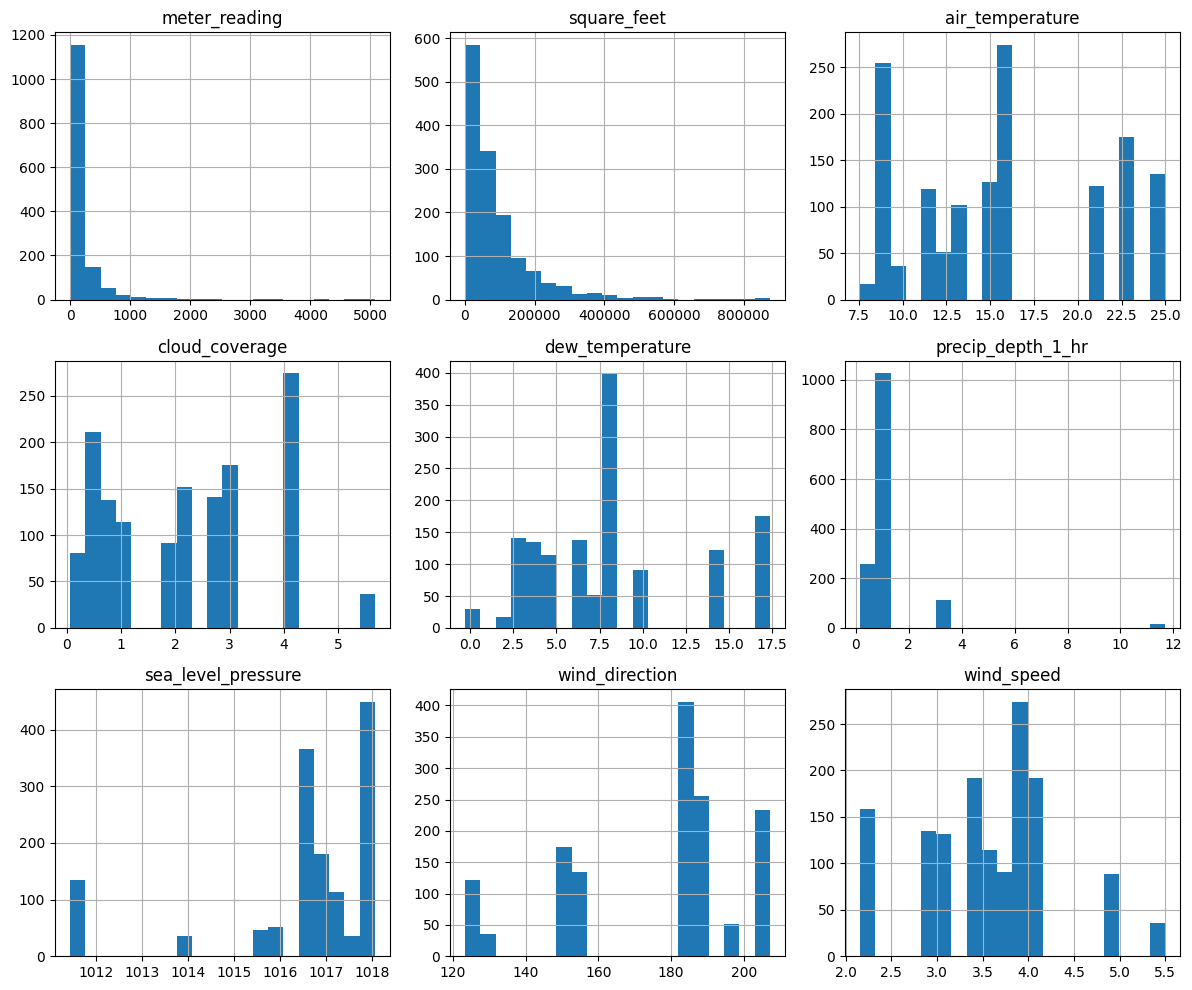

In [14]:
# 4. Visualisasi Distribusi Setiap Fitur
# Plot distribusi untuk setiap fitur numerik
df_knn.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()


**interpretasi**

1. Meter Reading: Distribusi sangat skewed ke kanan, dengan sebagian besar nilai berada di kisaran rendah. Hal ini menunjukkan bahwa sebagian besar bangunan memiliki penggunaan energi yang rendah.


2. Square Feet: Distribusi luas bangunan menunjukkan pola yang sangat skewed. Sebagian besar bangunan memiliki ukuran lebih kecil, tetapi terdapat beberapa bangunan yang sangat besar (outliers).


3. Air Temperature: Distribusi temperatur udara cukup seragam, dengan beberapa rentang suhu lebih sering muncul.


4. Cloud Coverage: Pola distribusi cenderung unimodal, dengan banyak data berkumpul di nilai tertentu (sekitar 3).


5. Dew Temperature: Distribusi memiliki puncak utama di rentang suhu sekitar 5–10°C.


6. Precipitation Depth: Sebagian besar nilai menunjukkan curah hujan rendah, tetapi ada nilai ekstrim yang cukup tinggi.


7. Sea Level Pressure: Tekanan udara memiliki distribusi sangat sempit, menunjukkan bahwa data ini cukup konsisten.


8. Wind Direction: Distribusi arah angin menyebar, tetapi ada beberapa arah angin yang lebih dominan.


9. Wind Speed: Kecepatan angin memiliki distribusi unimodal, dengan sebagian besar data berada pada nilai rendah hingga sedang.

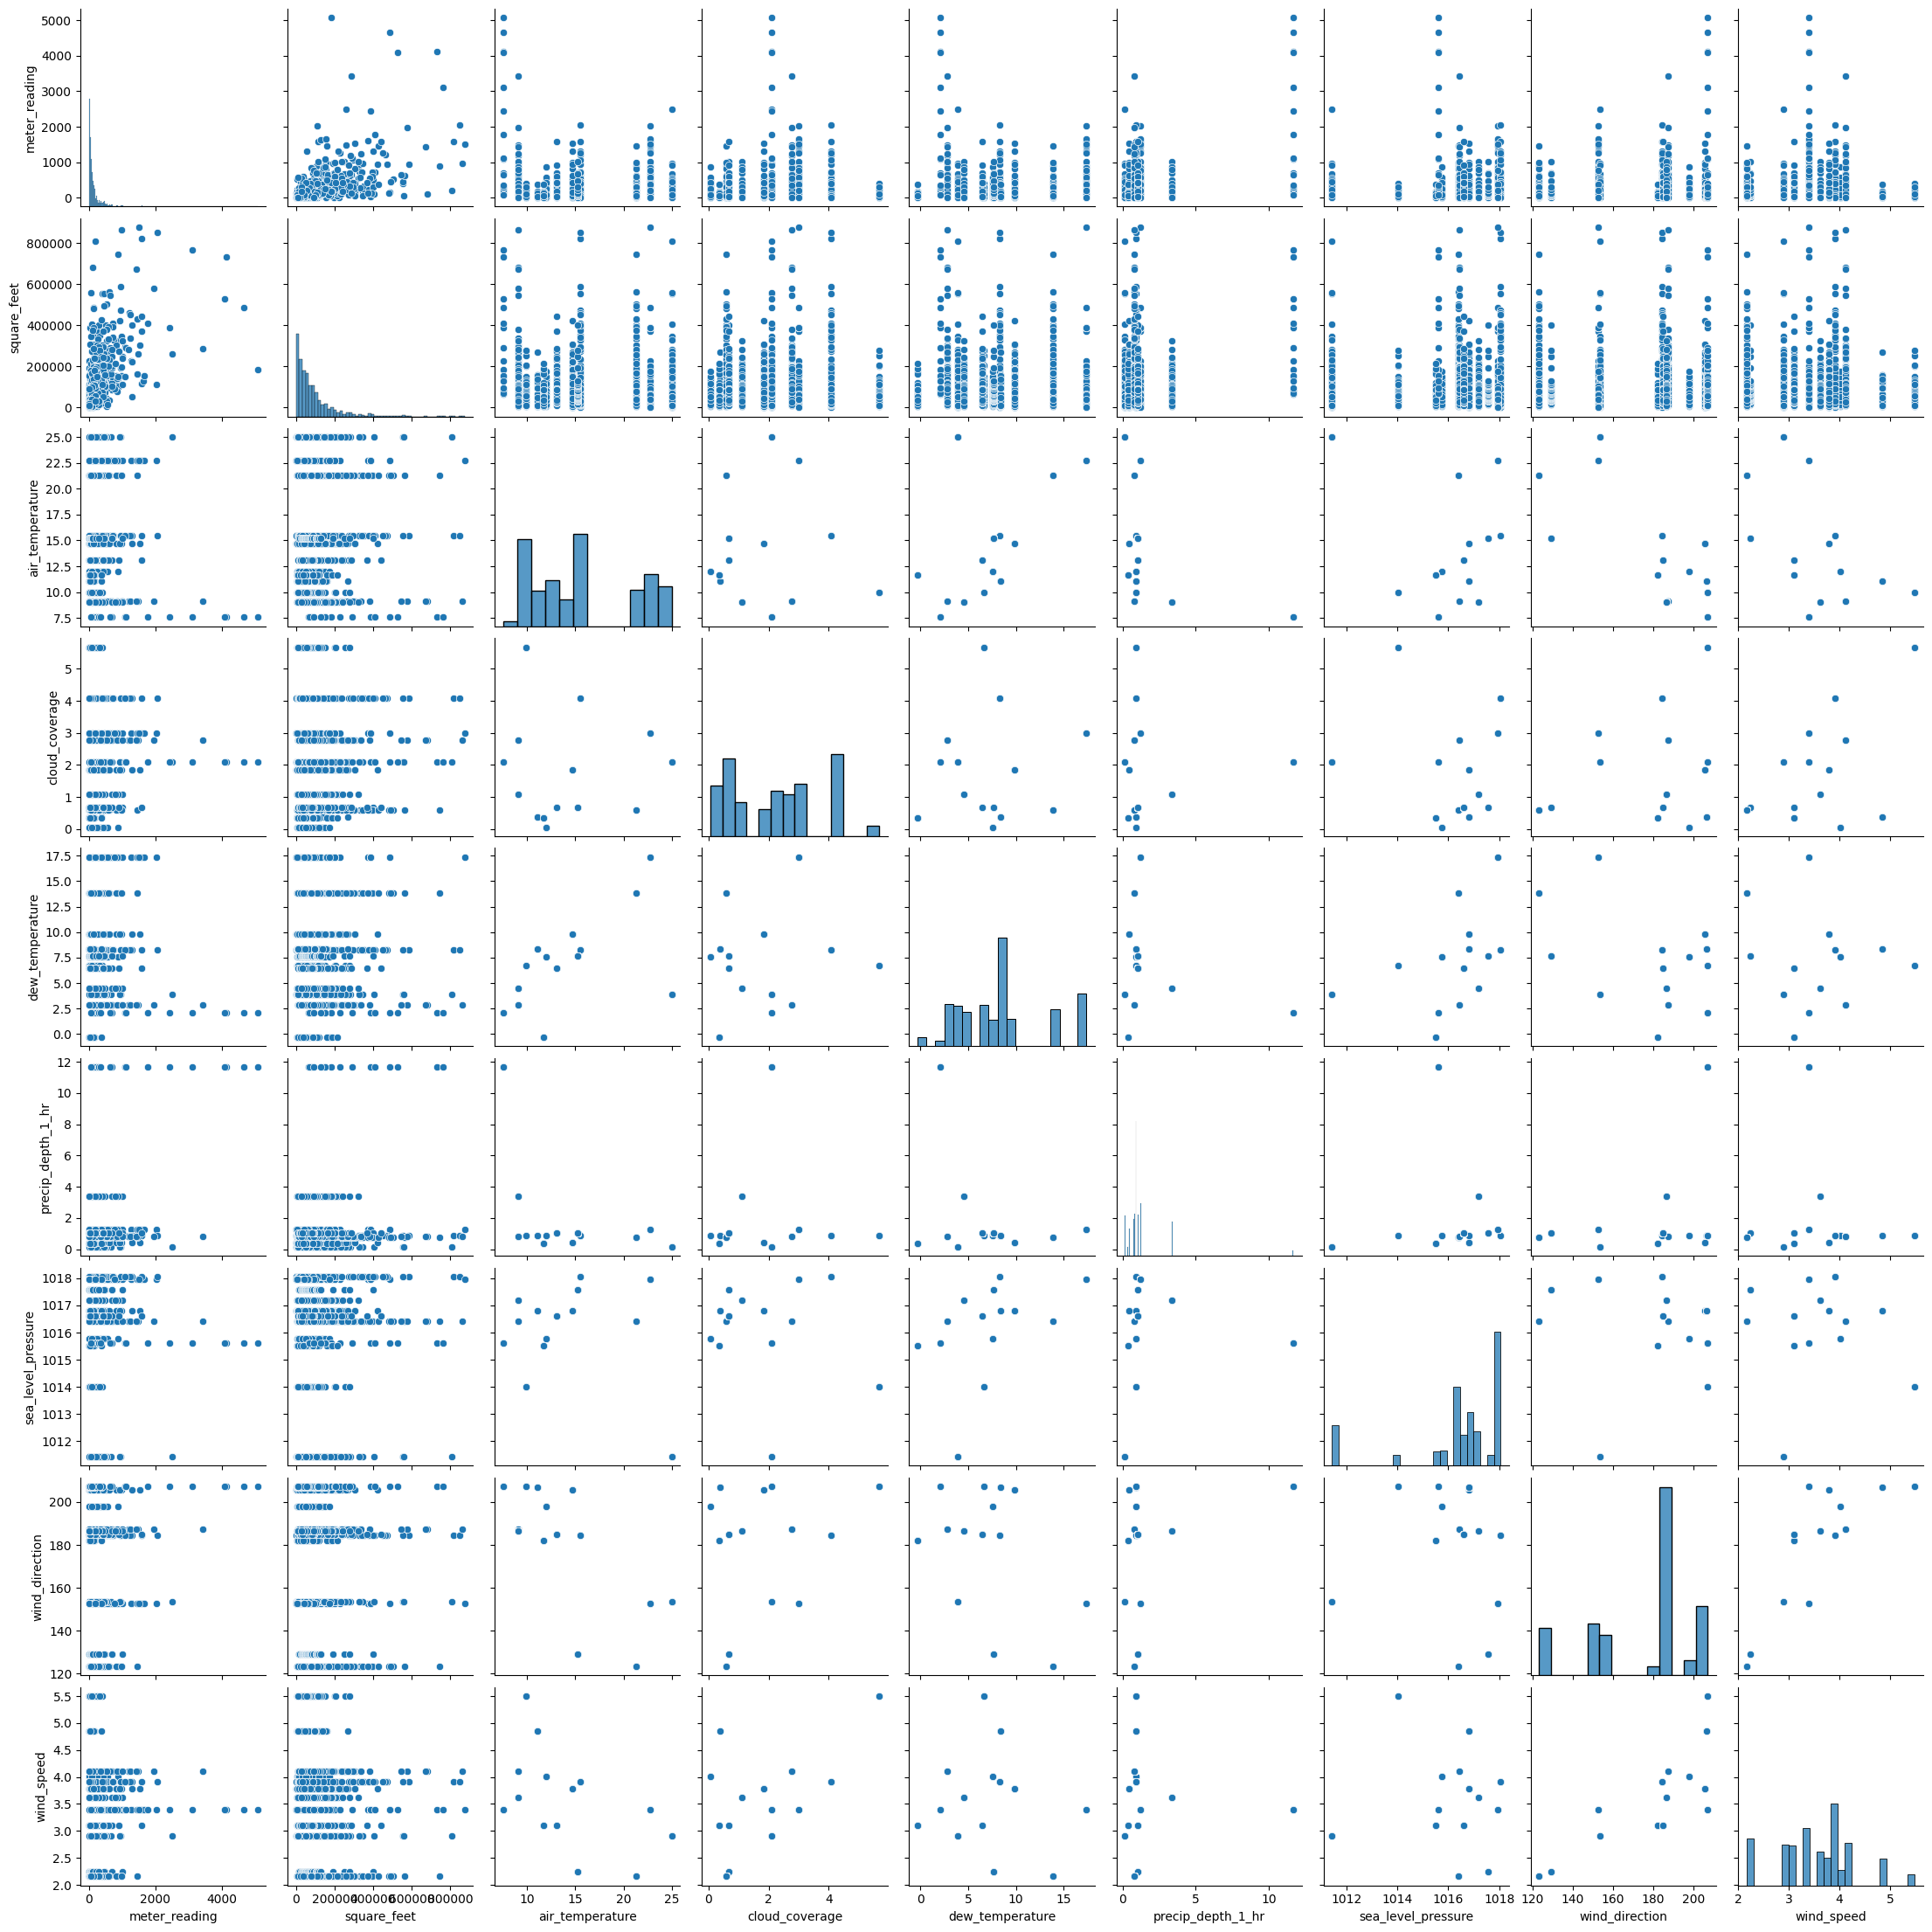

In [15]:
# 6. Visualisasi Hubungan Antar Fitur (Pairplot)
# Plot pairwise relationships untuk melihat hubungan antar fitur
sns.pairplot(df_knn)
plt.show()

**INTERPRETASI**

1. meter_reading vs square_feet: Semakin besar ukuran bangunan, cenderung semakin tinggi konsumsi energi.

2. Hubungan antara meter_reading dengan variabel lain (seperti air_temperature, cloud_coverage) : Tidak terlihat pola hubungan yang jelas.

3. meter_reading dan square_feet memiliki nilai yang banyak terkonsentrasi di angka kecil, dengan beberapa outliers (nilai ekstrem yang sangat besar).


4. Variabel lain seperti air_temperature, dew_temperature, dan sea_level_pressure memiliki distribusi yang lebih teratur.

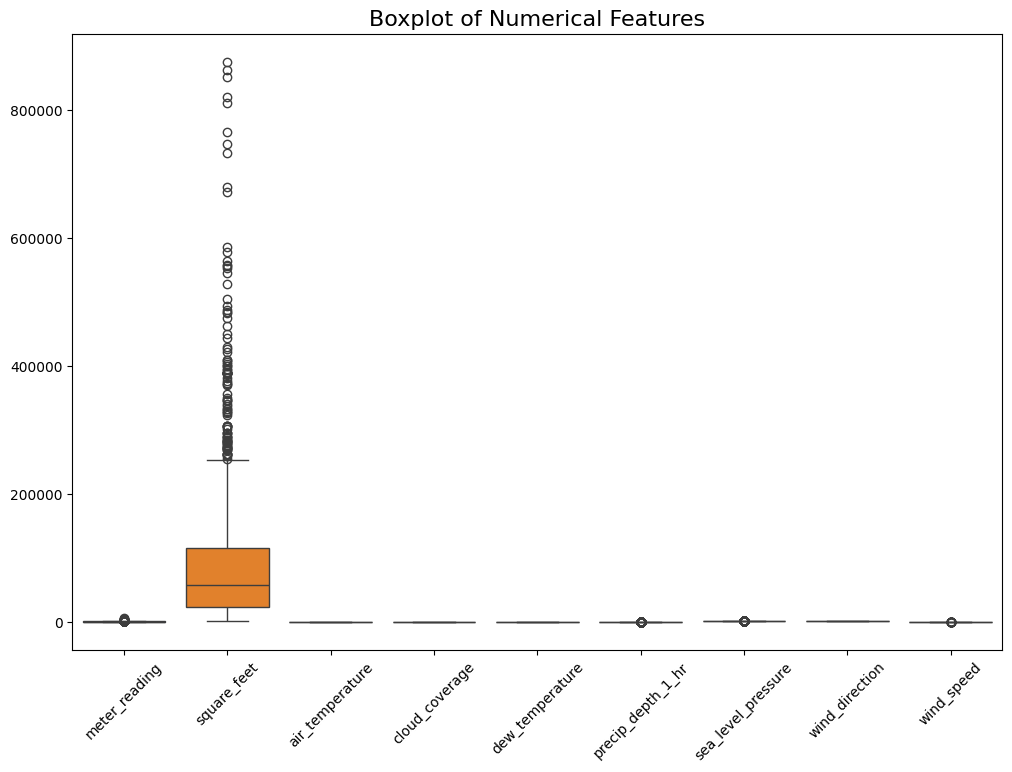

In [16]:
# 2. Boxplot untuk mengeksplorasi distribusi data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_knn.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.show()

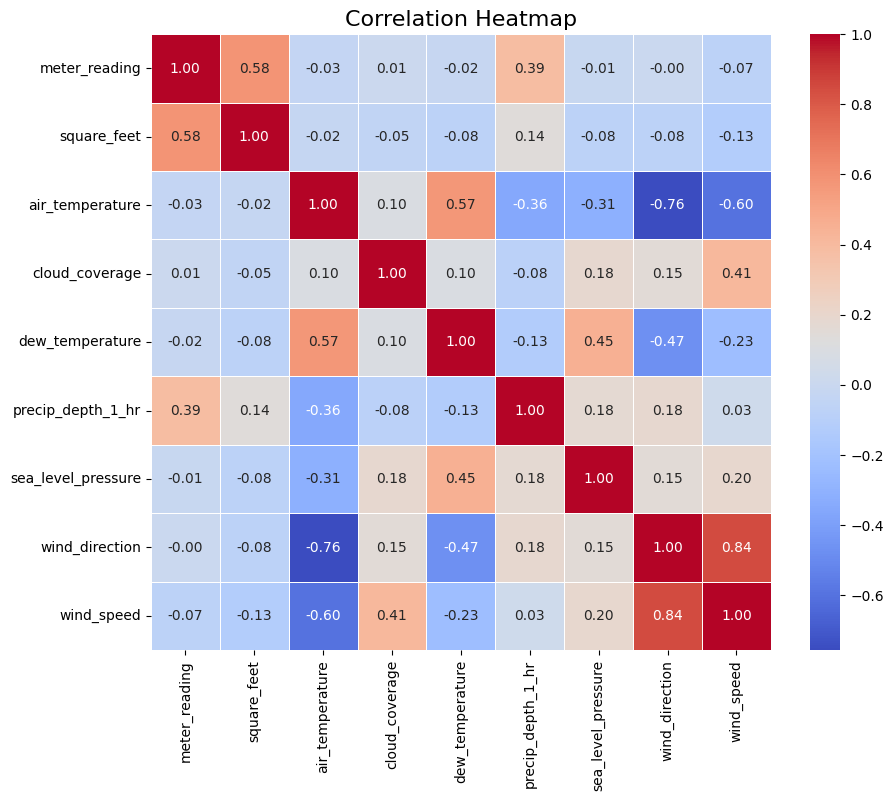

In [17]:

# 4. Heatmap korelasi antar fitur
plt.figure(figsize=(10, 8))
corr_matrix = df_knn.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## K-NEAREST NEIGHBORS

### MODEL

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Definisikan kolom target dan fitur
target_col = 'meter_reading'  # Ganti dengan nama kolom target Anda
X = df_knn_quantile.drop(columns=[target_col])
y = df_knn_quantile[target_col]

# 2. Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# 3. Buat model KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [20]:
# 4. Latih model pada data pelatihan
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [21]:
# 5. Prediksi pada data uji
y_pred_test = knn_regressor.predict(X_test)

In [22]:
# 6. Evaluasi model pada data uji
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

In [23]:
# 7. Prediksi pada data train untuk evaluasi tambahan
y_pred_train = knn_regressor.predict(X_train)

In [24]:
# 8. Evaluasi model pada data train
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

In [25]:
# 9. Cetak hasil evaluasi
print("Evaluasi Model KNN pada Data Train:")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R-squared (R²): {r2_train:.4f}")

print("\nEvaluasi Model KNN pada Data Test:")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}")

Evaluasi Model KNN pada Data Train:
Mean Absolute Error (MAE): 0.1089
Mean Squared Error (MSE): 0.0219
Root Mean Squared Error (RMSE): 0.1480
R-squared (R²): 0.7355

Evaluasi Model KNN pada Data Test:
Mean Absolute Error (MAE): 0.1208
Mean Squared Error (MSE): 0.0264
Root Mean Squared Error (RMSE): 0.1624
R-squared (R²): 0.6922


### VISUALISASI

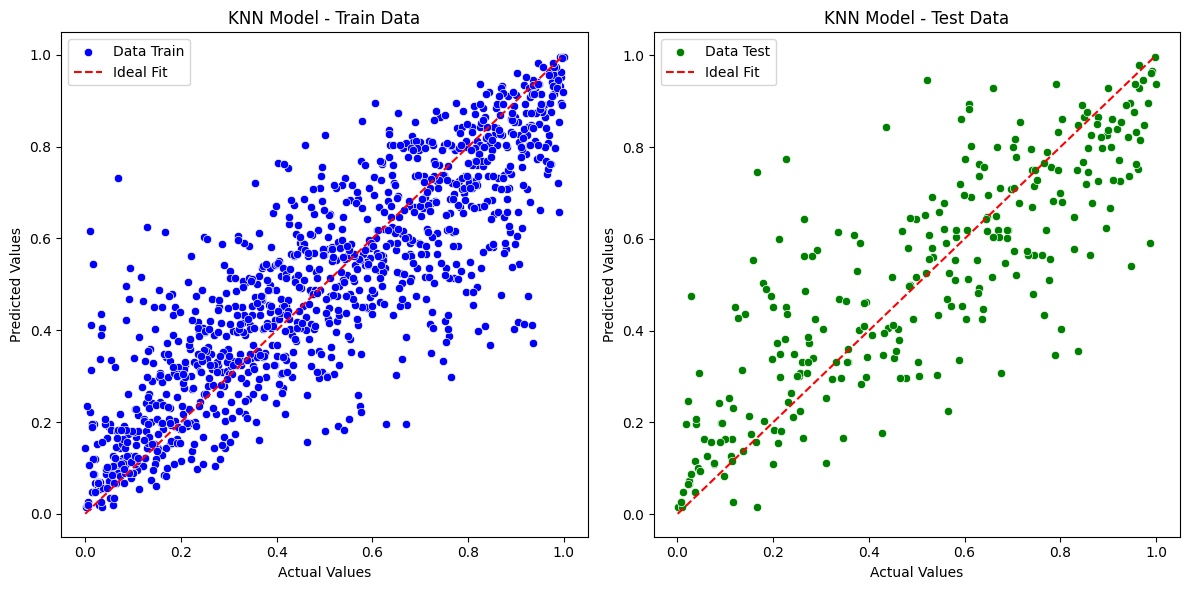

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot untuk membandingkan nilai sebenarnya vs prediksi
plt.figure(figsize=(12, 6))

# Data Train
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, color='blue', label='Data Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal Fit')
plt.title('KNN Model - Train Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Data Test
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, color='green', label='Data Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title('KNN Model - Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()



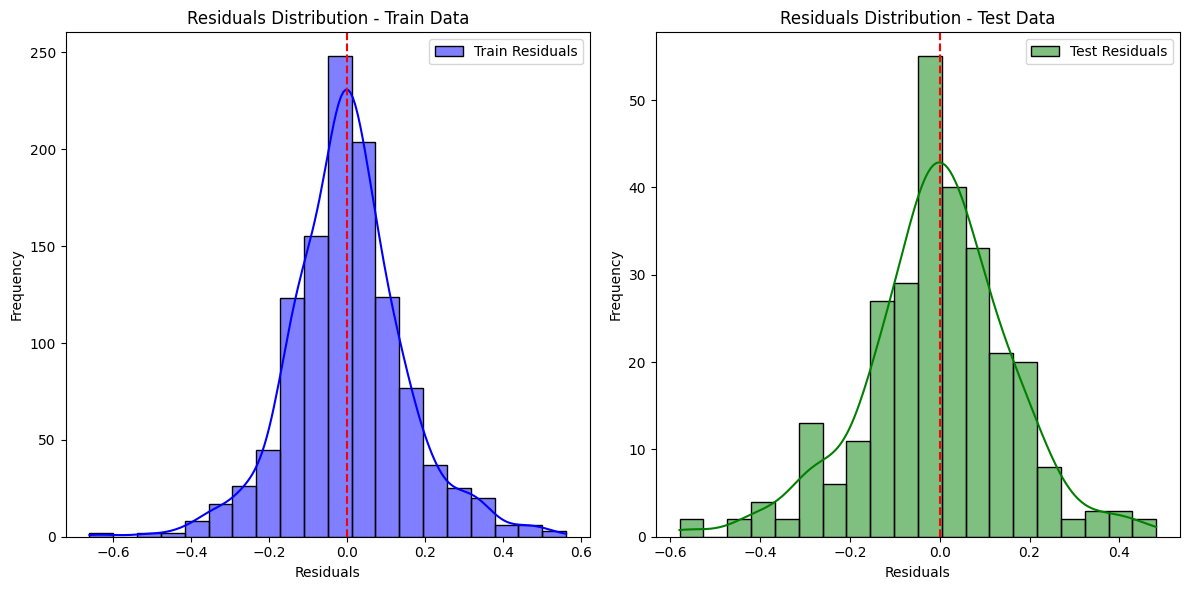

In [27]:
# Distribusi kesalahan (Residuals)
plt.figure(figsize=(12, 6))

# Residuals Train
residuals_train = y_train - y_pred_train
plt.subplot(1, 2, 1)
sns.histplot(residuals_train, kde=True, color='blue', bins=20, label='Train Residuals')
plt.axvline(0, color='red', linestyle='--')
plt.title('Residuals Distribution - Train Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

# Residuals Test
residuals_test = y_test - y_pred_test
plt.subplot(1, 2, 2)
sns.histplot(residuals_test, kde=True, color='green', bins=20, label='Test Residuals')
plt.axvline(0, color='red', linestyle='--')
plt.title('Residuals Distribution - Test Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## **INTERPRETASI**



### **1. Evaluasi pada Data Train**
- **Mean Absolute Error (MAE): 0.1089**  
  Rata-rata kesalahan absolut antara prediksi dan nilai sebenarnya pada data pelatihan adalah 0.1089. Nilai ini cukup rendah, menunjukkan model bekerja dengan baik pada data train.
  
- **Mean Squared Error (MSE): 0.0219**  
  Rata-rata kuadrat kesalahan pada data pelatihan adalah 0.0219. Nilai kecil ini menunjukkan bahwa model menangkap pola dengan baik pada data train.

- **Root Mean Squared Error (RMSE): 0.1480**  
  Kesalahan rata-rata dalam skala yang sama dengan target (karena di-root) adalah 0.1480, menegaskan kinerja yang baik pada data train.

- **R-squared (R²): 0.7355**  
  Model menjelaskan 73.55% variabilitas pada data train. Ini adalah indikasi yang cukup baik, tetapi masih ada ruang untuk perbaikan.

---

### **2. Evaluasi pada Data Test**
- **Mean Absolute Error (MAE): 0.1208**  
  Rata-rata kesalahan absolut pada data uji adalah 0.1208, hanya sedikit lebih tinggi dibandingkan dengan data train. Ini menunjukkan bahwa model dapat melakukan generalisasi dengan baik.

- **Mean Squared Error (MSE): 0.0264**  
  MSE pada data uji sedikit lebih tinggi dibandingkan dengan data train (0.0264 vs. 0.0219), tetapi perbedaannya tidak signifikan.

- **Root Mean Squared Error (RMSE): 0.1624**  
  RMSE menunjukkan kesalahan rata-rata pada data test sedikit lebih besar dibandingkan dengan train. Namun, perbedaan ini dapat diterima.

- **R-squared (R²): 0.6922**  
  Model menjelaskan 69.22% variabilitas pada data uji. Meskipun lebih rendah dari data train, nilai ini masih cukup baik untuk menunjukkan bahwa model tidak terlalu **overfitting**.

---

### **3. Kesimpulan**
1. **Model KNN memiliki performa yang konsisten pada data train dan test**:
   - MAE, MSE, dan RMSE menunjukkan hasil yang mirip antara data train dan test.
   - R² untuk data test (69.22%) cukup dekat dengan train (73.55%), menunjukkan model tidak terlalu overfitting atau underfitting.

2. **Model dapat diandalkan untuk memprediksi data baru**:
   - Performa pada data test menunjukkan bahwa model mampu menangkap pola data dengan baik.


## Data evaluasi untuk tiap model

In [28]:
import pandas as pd

# Data evaluasi untuk model
data = {
    'Model': ['KNN', 'Linear Regression', 'Random Forest', 'SVM'],
    'RMSE_Train': [0.1480, None, None, None],
    'RMSE_Test': [0.1624, None, None, None],
    'R2_Train': [0.7355, None, None, None],
    'R2_Test': [0.6922, None, None, None]
}

# Membuat DataFrame
evaluation_table = pd.DataFrame(data)

# Menampilkan tabel
from IPython.display import display
display(evaluation_table)


,Model,RMSE_Train,RMSE_Test,R2_Train,R2_Test
0,KNN,0.148,0.1624,0.7355,0.6922
1,Linear Regression,NaN,NaN,NaN,NaN
2,Random Forest,NaN,NaN,NaN,NaN
3,SVM,NaN,NaN,NaN,NaN
